In [42]:
# code by Mohammed Mossad at 21/2/2025 8:28 PM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [3]:
df_train = pd.read_csv(r'/kaggle/input/playground-series-s4e6/train.csv')

In [4]:
df_train.head(10)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
5,5,1,39,1,171,1,19,133.1,1,19,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,Dropout
6,6,1,44,1,9085,1,39,130.0,1,37,...,0,5,8,5,13.250000,0,12.4,0.5,1.79,Graduate
7,7,1,1,1,9773,1,1,130.0,1,19,...,0,6,6,6,13.666667,0,10.8,1.4,1.74,Graduate
8,8,1,39,1,9003,1,1,133.1,1,19,...,0,6,10,0,0.000000,0,16.2,0.3,-0.92,Dropout
9,9,1,1,6,9500,1,1,135.0,1,37,...,0,7,7,6,12.966667,0,7.6,2.6,0.32,Graduate


In [5]:
df_train.shape

(76518, 38)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [7]:
df_train.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [8]:
for i in df_train.columns:
    print(f'\n {i} column\n min value: {df_train[i].min()} \n max value: {df_train[i].max()}')
    print("\n ---------------------------------------")



 id column
 min value: 0 
 max value: 76517

 ---------------------------------------

 Marital status column
 min value: 1 
 max value: 6

 ---------------------------------------

 Application mode column
 min value: 1 
 max value: 53

 ---------------------------------------

 Application order column
 min value: 0 
 max value: 9

 ---------------------------------------

 Course column
 min value: 33 
 max value: 9991

 ---------------------------------------

 Daytime/evening attendance column
 min value: 0 
 max value: 1

 ---------------------------------------

 Previous qualification column
 min value: 1 
 max value: 43

 ---------------------------------------

 Previous qualification (grade) column
 min value: 95.0 
 max value: 190.0

 ---------------------------------------

 Nacionality column
 min value: 1 
 max value: 109

 ---------------------------------------

 Mother's qualification column
 min value: 1 
 max value: 44

 ---------------------------------------

 Fa

## Data Wrangling

In [9]:
df_train.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [10]:
df_train.isna().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [11]:
df_train.duplicated().sum()

0

In [12]:
for i in df_train.columns:
    print(f'\n column {i} have: ({df_train[i].nunique()}) unique values')
    print("\n---------------------------")
    


 column id have: (76518) unique values

---------------------------

 column Marital status have: (6) unique values

---------------------------

 column Application mode have: (22) unique values

---------------------------

 column Application order have: (8) unique values

---------------------------

 column Course have: (19) unique values

---------------------------

 column Daytime/evening attendance have: (2) unique values

---------------------------

 column Previous qualification have: (21) unique values

---------------------------

 column Previous qualification (grade) have: (110) unique values

---------------------------

 column Nacionality have: (18) unique values

---------------------------

 column Mother's qualification have: (35) unique values

---------------------------

 column Father's qualification have: (39) unique values

---------------------------

 column Mother's occupation have: (40) unique values

---------------------------

 column Father's occupa

In [13]:
df_train['Target'].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

## EDA

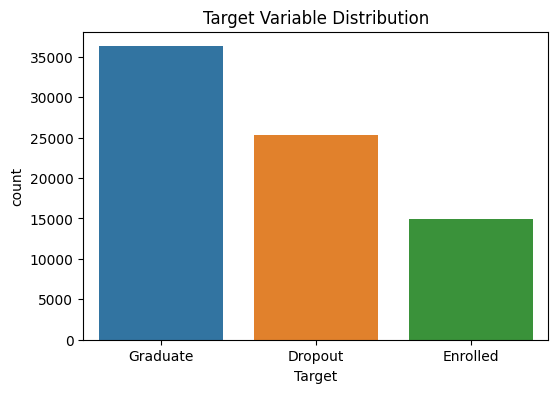

In [14]:
# Visualizing target distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df_train['Target'])
plt.title("Target Variable Distribution")
plt.show()

*  conclusion: most students are graduate

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


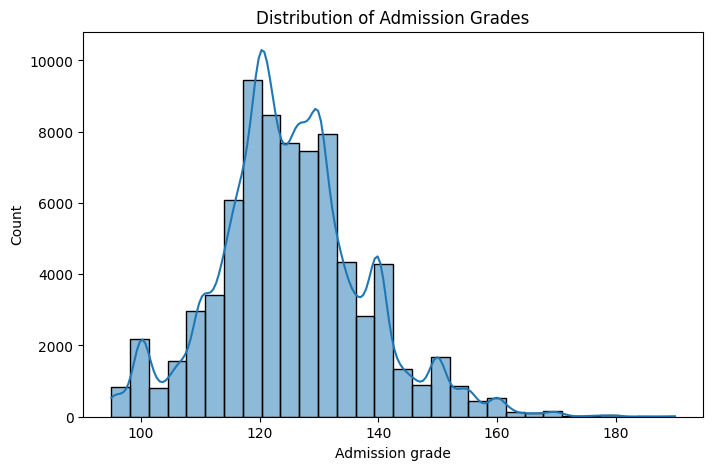

In [15]:
# Visualizing admission grades
plt.figure(figsize=(8,5))
sns.histplot(df_train['Admission grade'], bins=30, kde=True)
plt.title("Distribution of Admission Grades")
plt.show()

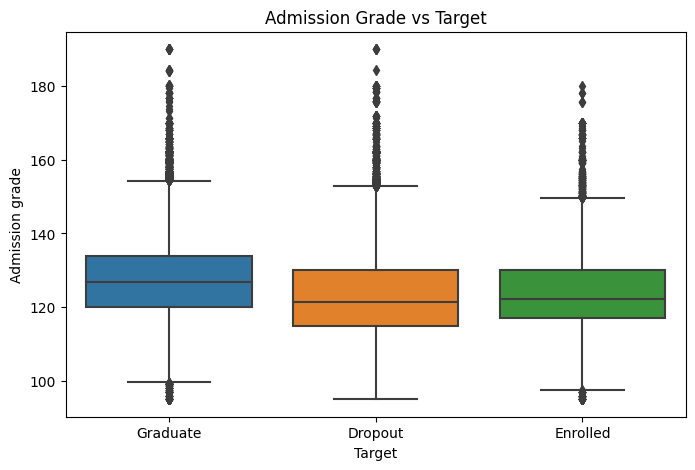

In [16]:
# Box plot of admission grades by target category
plt.figure(figsize=(8,5))
sns.boxplot(x=df_train['Target'], y=df_train['Admission grade'])
plt.title("Admission Grade vs Target")
plt.show()

conclusions:
*  students with higher admission grades are more likely to graduate.
*  Enrolled students have a distribution similar to dropouts.
*  some enrolled students are at risk of dropping out.

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(numeric_only = True), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

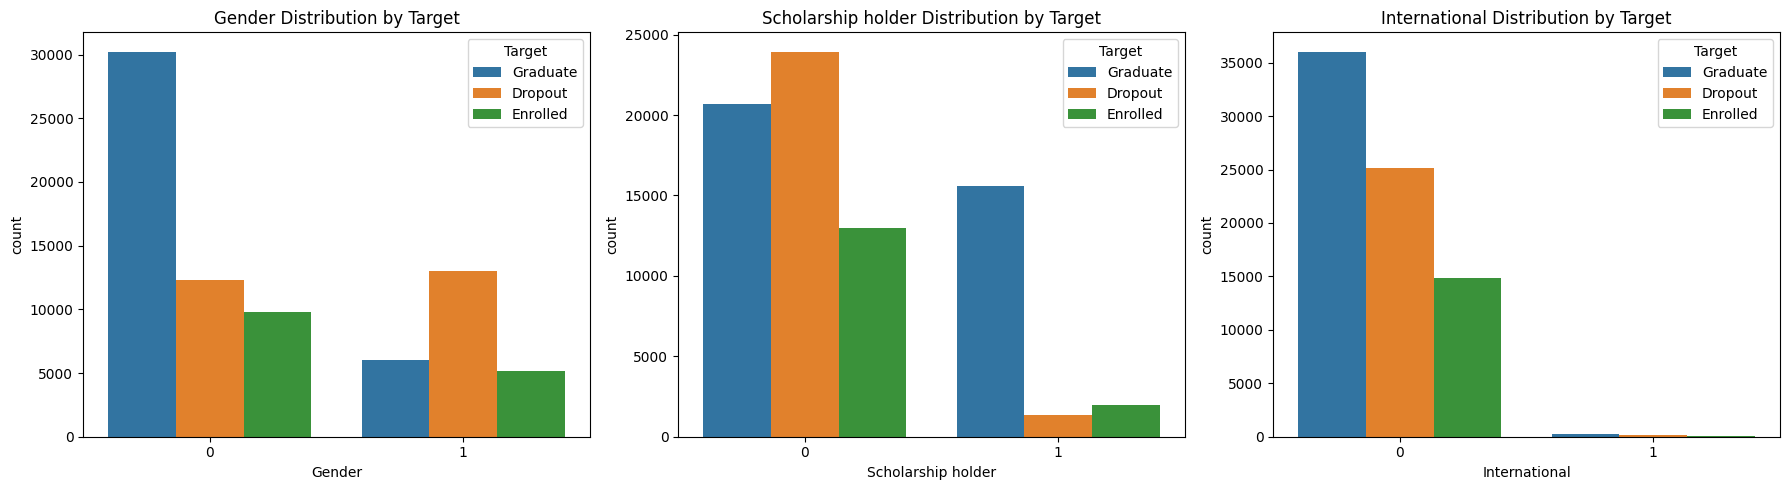

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical features
features = ['Gender', 'Scholarship holder', 'International']

# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(18, 5))

for i, feature in enumerate(features):
    sns.countplot(x=feature, hue='Target', data=df_train, ax=axes[i])
    axes[i].set_title(f"{feature} Distribution by Target")

plt.tight_layout()
plt.show()


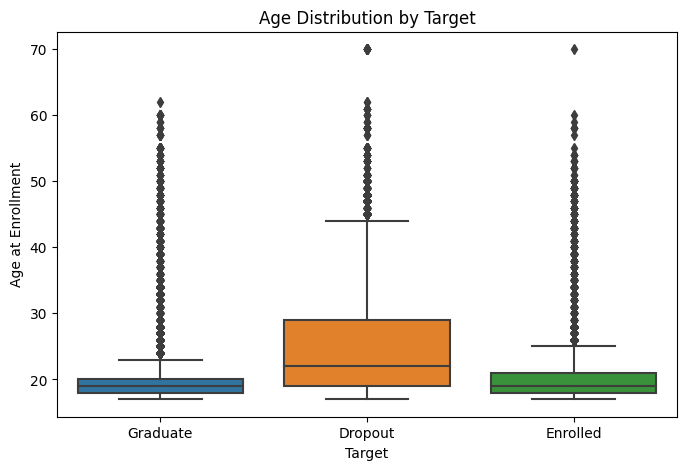

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_train['Target'], y=df_train['Age at enrollment'])
plt.title("Age Distribution by Target")
plt.xlabel("Target")
plt.ylabel("Age at Enrollment")
plt.show()

* conclusion: older students are more likely to drop out

In [20]:
financial_issues = df_train.groupby('Target')['Debtor'].sum().reset_index()
financial_issues.columns = ['Target', 'Financial Issues Students']
financial_issues



,Target,Financial Issues Students
0,Dropout,4179
1,Enrolled,653
2,Graduate,630


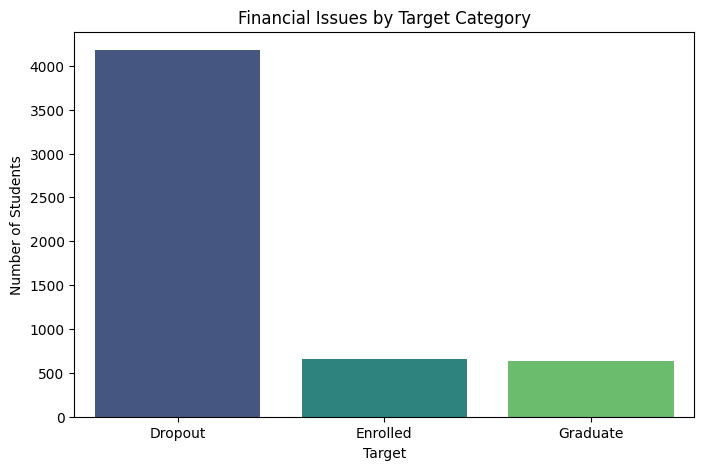

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='Target', y='Financial Issues Students', data=financial_issues, palette='viridis')
plt.title("Financial Issues by Target Category")
plt.ylabel("Number of Students")
plt.xlabel("Target")
plt.show()

* conclusion: most student that have finnancial issues drops out :'-(

## Data Preprocessing

#### Drop unimportant columns

In [22]:
df_train.drop(['id'] , axis = 1 , inplace = True)

In [23]:
X = df_train.drop(['Target'], axis = 1)
Y = df_train['Target']

In [24]:
X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,0,7,12,6,12.933333,0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,121.0,1,19,1,...,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79
76514,1,1,6,9254,1,1,125.0,1,1,38,...,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12
76515,5,17,1,9085,1,1,138.0,1,37,37,...,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12
76516,1,1,3,9070,1,1,136.0,1,38,37,...,0,0,6,0,0,0.000000,0,7.6,2.6,0.32


In [25]:
Y

0        Graduate
1         Dropout
2         Dropout
3        Enrolled
4        Graduate
           ...   
76513    Graduate
76514    Graduate
76515    Enrolled
76516     Dropout
76517    Graduate
Name: Target, Length: 76518, dtype: object

In [26]:
features = [
    'Daytime/evening attendance', 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target'
]
features_to_scale = [col for col in df_train.columns if col not in features]

scaler = MinMaxScaler()


In [27]:
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [28]:
Y

array([2, 0, 0, ..., 1, 0, 2])

## Data Splitting

In [29]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,train_size=0.8,shuffle=True,random_state=42)

In [30]:
x_train[features_to_scale] = scaler.fit_transform(x_train[features_to_scale])
x_test[features_to_scale] = scaler.transform(x_test[features_to_scale])

In [35]:
x_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
12065,0.0,0.826923,0.111111,0.909018,1,0.904762,0.578947,0.0,0.837209,0.837209,...,0.0,0.052632,0.26087,0.636364,0.25,0.709877,0.0,1.000000,0.244444,0.414795
17210,0.0,0.307692,0.222222,0.925989,1,0.000000,0.336842,0.0,0.000000,0.000000,...,0.0,0.000000,0.26087,0.363636,0.15,0.611111,0.0,0.918605,0.800000,0.000000
60954,0.0,0.000000,0.111111,0.978108,1,0.000000,0.473684,0.0,0.837209,0.860465,...,0.0,0.000000,0.26087,0.181818,0.25,0.677778,0.0,0.000000,0.755556,0.578600
2322,0.0,0.000000,0.111111,0.013858,1,0.000000,0.157895,0.0,0.418605,0.023256,...,0.0,0.000000,0.00000,0.000000,0.00,0.000000,0.0,0.558140,0.288889,0.772787
374,0.0,0.730769,0.111111,0.924382,1,0.428571,0.401053,0.0,0.767442,0.860465,...,0.0,0.000000,0.26087,0.393939,0.05,0.611111,0.0,0.209302,0.000000,0.124174


In [31]:
x_train.shape

(61214, 36)

In [32]:
x_test.shape

(15304, 36)

In [36]:
y_train.shape

(61214,)

In [37]:
y_test.shape

(15304,)

## ANN Modeling

In [62]:
input_dim = x_train.shape[1]
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=input_dim))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=12,          
    restore_best_weights=True  
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 128)                 │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,171 (59.26 KB)

 Trainable params: 15,171 (59.26 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
history = model.fit(x_train,y_train,epochs=100 ,validation_split=0.2 , callbacks=[early_stopping])

Epoch 1/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7500 - loss: 0.6159 - val_accuracy: 0.8141 - val_loss: 0.4807
Epoch 2/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8052 - loss: 0.5054 - val_accuracy: 0.8127 - val_loss: 0.4796
Epoch 3/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8093 - loss: 0.4890 - val_accuracy: 0.8143 - val_loss: 0.4691
Epoch 4/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8166 - loss: 0.4776 - val_accuracy: 0.8126 - val_loss: 0.4735
Epoch 5/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8148 - loss: 0.4782 - val_accuracy: 0.8183 - val_loss: 0.4658
Epoch 6/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8177 - loss: 0.4761 - val_accuracy: 0.8175 - val_loss: 0.4634
Epoch 7/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8172 - loss: 0.4715 - val_accuracy: 0.8151 - val_loss: 0.4652
Epoch 8/100
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8195 - loss: 0

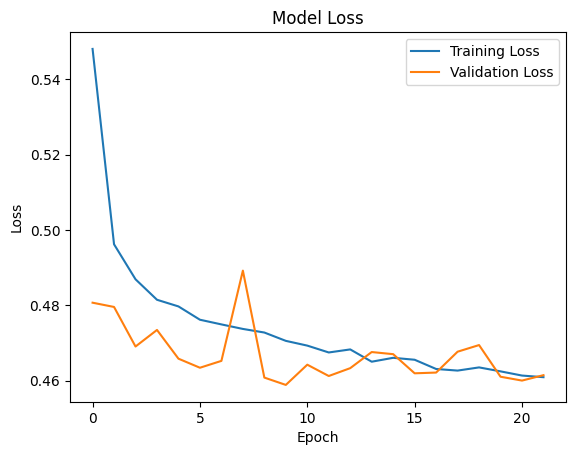

In [66]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='best')  
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

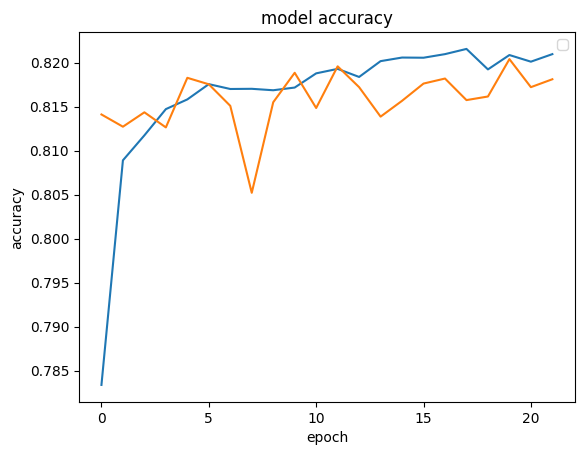

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(loc='best') 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [69]:
y_pred = model.predict(x_test)

479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [72]:
model.evaluate(x_test,y_test)

479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8218 - loss: 0.4618


[0.459923654794693, 0.8212231993675232]

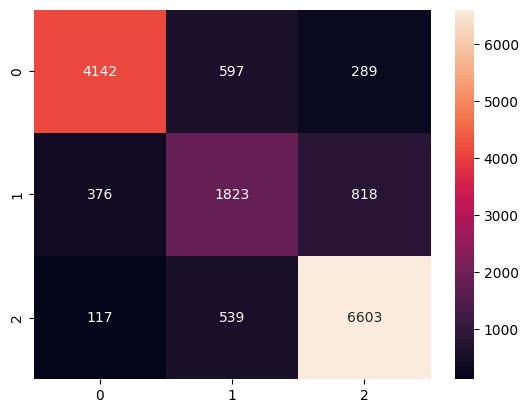

In [76]:
y_pred_classes = np.argmax(y_pred, axis=1)  
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()